Клиентам были отправлены два макета электронных писем (А и Б). Для каждого клиента известен пол и возраст.
В приложенном файле результаты отработки кампании: доставлено писем, открыто писем, сколько клиентов перешло по ссылке после открытия письма, сколько клиентов отписалось от рассылки.

Необходимо оценить, как сегменты отреагировали на рассылку в рамках каждого макета? И выяснить, какой из шаблонов в перспективных рассылках лучше всего отправлять клиентам?

Необходимо указать, какими программными средствами решалась задача? Вкратце указать алгоритм.
Какие параметры использовались для оценки при принятии решения о том, какой макет лучше?
Какие можно дать рекомендации по отправке макетов разным сегментам?


# Предобработка данных

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats as st
import math as mth

In [ ]:
df = pd.read_excel('/content/тестовое задание.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42126 entries, 0 to 42125
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Номер клиента      42126 non-null  int64  
 1   Макет              42126 non-null  object 
 2   Доставлено         23007 non-null  float64
 3   Открыто            42126 non-null  int64  
 4   Переход по ссылке  42126 non-null  int64  
 5   Отписки            42126 non-null  int64  
 6   Возраст            42126 non-null  float64
 7   Пол                42126 non-null  object 
dtypes: float64(2), int64(4), object(2)
memory usage: 2.6+ MB


In [ ]:
df.describe()

,Номер клиента,Доставлено,Открыто,Переход по ссылке,Отписки,Возраст
count,42126.000000,23007.0,42126.000000,42126.000000,42126.000000,42126.000000
mean,21063.500000,1.0,0.093529,0.018326,0.008498,35.832854
std,12160.873057,0.0,0.291176,0.134129,0.091795,5.363511
min,1.000000,1.0,0.000000,0.000000,0.000000,23.339726
25%,10532.250000,1.0,0.000000,0.000000,0.000000,31.920548
50%,21063.500000,1.0,0.000000,0.000000,0.000000,35.932877
75%,31594.750000,1.0,0.000000,0.000000,0.000000,39.961644
max,42126.000000,1.0,1.000000,1.000000,1.000000,52.049315


In [ ]:
df.duplicated().sum()

0

Проверим значения в строках с Nan в столбце `[Доставлено]` 

In [ ]:
df[df['Доставлено'].isnull()].describe()

,Номер клиента,Доставлено,Открыто,Переход по ссылке,Отписки,Возраст
count,19119.000000,0.0,19119.0,19119.0,19119.0,19119.000000
mean,23285.469690,NaN,0.0,0.0,0.0,35.866918
std,9111.852242,NaN,0.0,0.0,0.0,5.347281
min,1876.000000,NaN,0.0,0.0,0.0,23.421918
25%,17764.500000,NaN,0.0,0.0,0.0,31.978082
50%,22544.000000,NaN,0.0,0.0,0.0,35.928767
75%,29532.500000,NaN,0.0,0.0,0.0,39.991781
max,42122.000000,NaN,0.0,0.0,0.0,52.049315


Ошибок нет, значение Nan соответствует только строкам с недоставленными письмами

In [ ]:
nan_del = df['Доставлено'].isnull().sum()

In [ ]:
per_nan_del = df['Доставлено'].isnull().mean()

In [ ]:
print(f'Процент пропусков в столбце "Доставлено" {per_nan_del:.1%} или {nan_del} строк')

Процент пропусков в столбце "Доставлено" 45.4% или 19119 строк


Заполним пропуски нулями:

In [ ]:
df = df.fillna(0).copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42126 entries, 0 to 42125
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Номер клиента      42126 non-null  int64  
 1   Макет              42126 non-null  object 
 2   Доставлено         42126 non-null  float64
 3   Открыто            42126 non-null  int64  
 4   Переход по ссылке  42126 non-null  int64  
 5   Отписки            42126 non-null  int64  
 6   Возраст            42126 non-null  float64
 7   Пол                42126 non-null  object 
dtypes: float64(2), int64(4), object(2)
memory usage: 2.6+ MB


In [ ]:
df.head()

,Номер клиента,Макет,Доставлено,Открыто,Переход по ссылке,Отписки,Возраст,Пол
0,1,Шаблон Б,1.0,1,0,0,41.690411,М
1,2,Шаблон Б,1.0,1,0,0,28.249315,Ж
2,3,Шаблон Б,1.0,1,0,0,31.435616,М
3,4,Шаблон Б,1.0,1,0,0,34.564384,М
4,5,Шаблон Б,1.0,1,0,0,35.260274,М


Заметим, что возраст указан числом с плавающей точкой. Округлим эти значения в меньшую сторону:

In [ ]:
df['Возраст'] = df['Возраст'].astype(int)

In [ ]:
df['Доставлено'] = df['Доставлено'].astype(int)

## Вывод
Данные содержат 42126 строк и 7 столбцов.  
Процент пропусков в столбце "Доставлено" 19119 строк. Количество не доставленных писем составляет 45.4%.  
Дубликаты отсутствуют.  
Данные приведены к корректным форматам, пропуски заполнены.

# Анализ данных

## Заполнение макета таблицы

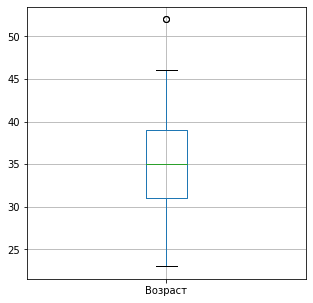

In [ ]:
df['Возраст'].plot(kind='box', figsize=(5, 5), grid=True);

Разобъем клиентов на сегменты согласно возрастным группам.

In [ ]:
age = pd.cut(df['Возраст'], 
             [0, 27, 40 , df['Возраст'].max()], 
             labels=['до 27', 'от 28 до 40', 'от 41'])

In [ ]:
df['age'] = age

In [ ]:
df[df['Возраст']==27].sample(5)

,Номер клиента,Макет,Доставлено,Открыто,Переход по ссылке,Отписки,Возраст,Пол,age
36081,36082,Шаблон А,0,0,0,0,27,М,до 27
15744,15745,Шаблон Б,1,0,0,0,27,М,до 27
32308,32309,Шаблон А,1,0,0,0,27,Ж,до 27
20437,20438,Шаблон А,0,0,0,0,27,Ж,до 27
21904,21905,Шаблон А,0,0,0,0,27,Ж,до 27


In [ ]:
df[(df['Возраст'] == 40) | (df['Возраст'] == 41) | (df['Возраст'] == 27)].sample(5)

,Номер клиента,Макет,Доставлено,Открыто,Переход по ссылке,Отписки,Возраст,Пол,age
37513,37514,Шаблон А,0,0,0,0,41,Ж,от 41
17785,17786,Шаблон А,0,0,0,0,41,Ж,от 41
38490,38491,Шаблон А,0,0,0,0,41,М,от 41
3100,3101,Шаблон Б,0,0,0,0,27,М,до 27
18763,18764,Шаблон А,0,0,0,0,27,Ж,до 27


Просуммируем значения в столбцах для проверки сводной таблицы

In [ ]:
df.sum(numeric_only=True)

Номер клиента        887321001
Доставлено               23007
Открыто                   3940
Переход по ссылке          772
Отписки                    358
Возраст                1488137
dtype: int64

Заполним макет таблицы:

In [ ]:
df_answer = pd.pivot_table(df,
               index=['Макет', 'age', 'Пол'],
               values=['Доставлено', 'Открыто', 'Переход по ссылке', 'Отписки'],
               aggfunc=['sum'],
               margins=True)
df_answer

sum                                  
                         Доставлено Открыто Отписки Переход по ссылке
Макет    age         Пол                                             
Шаблон А до 27       Ж          630      87       5                11
                     М          229      32       2                 4
         от 28 до 40 Ж         4236     761      72               155
                     М         2959     706      69               122
         от 41       Ж         1094     217      19                39
                     М          875     262      24                51
Шаблон Б до 27       Ж          865      63       8                12
                     М          313      23       5                 4
         от 28 до 40 Ж         5534     677      59               149
                     М         3721     632      65               123
         от 41       Ж         1393     219      14                50
                     М         1158     261      16                52
All                           23007    3940     358               772

Итоговые значения совпадают, значит сводная таблица составлена верно.

## Оценка изменений в общем и в рамках каждого шаблона писем

Создадим новый DataFrame и подготовим для дальнейшего анализа.

In [ ]:
df_full = df

In [ ]:
cols = list(df_full.columns.values)
cols

['Номер клиента',
 'Макет',
 'Доставлено',
 'Открыто',
 'Переход по ссылке',
 'Отписки',
 'Возраст',
 'Пол',
 'age']

In [ ]:
df_full = df_full[['Номер клиента',
 'Макет',
 'Доставлено',
 'Открыто',
 'Переход по ссылке',
 'Отписки',
 'Возраст',
 'Пол',
 'age']]

In [ ]:
df_full = pd.pivot_table(df,
               index=['Макет', 'age', 'Пол'],
               values=['Доставлено', 'Открыто', 'Отписки', 'Переход по ссылке'],
               aggfunc=['sum'])

In [ ]:
df_full = df_full.reset_index()

In [ ]:
df_full.columns = ['Макет', 'Группа', 'Пол', 'Доставлено', 'Открыто', 'Отписки', 'Переход по ссылке']

In [ ]:
df_full

,Макет,Группа,Пол,Доставлено,Открыто,Отписки,Переход по ссылке
0,Шаблон А,до 27,Ж,630,87,5,11
1,Шаблон А,до 27,М,229,32,2,4
2,Шаблон А,от 28 до 40,Ж,4236,761,72,155
3,Шаблон А,от 28 до 40,М,2959,706,69,122
4,Шаблон А,от 41,Ж,1094,217,19,39
5,Шаблон А,от 41,М,875,262,24,51
6,Шаблон Б,до 27,Ж,865,63,8,12
7,Шаблон Б,до 27,М,313,23,5,4
8,Шаблон Б,от 28 до 40,Ж,5534,677,59,149
9,Шаблон Б,от 28 до 40,М,3721,632,65,123


In [ ]:
# таблица распределения по макету
con = df_full.groupby(['Макет']).agg('sum').reset_index()

In [ ]:
# таблица распределения по возрасту
con_age = df_full.groupby(['Группа']).agg('sum').reset_index()

In [ ]:
# таблица распределения по полу
con_gender = df_full.groupby(['Пол']).agg('sum').reset_index()

In [ ]:
# функция расчета долей
def per_val(df):
  df['Открыто/Доставлено, %'] = round(df.iloc[:,2] / df.iloc[:,1], 3) * 100
  df['Отписки/Доставлено, %'] = round(df.iloc[:,3] / df.iloc[:,1], 3) * 100
  df['Переход по ссылке/Доставлено, %'] = round(df.iloc[:,4] / df.iloc[:,1], 3) * 100

In [ ]:
per_val(con)
per_val(con_age)
per_val(con_gender)

In [ ]:
con

,Макет,Доставлено,Открыто,Отписки,Переход по ссылке,"Открыто/Доставлено, %","Отписки/Доставлено, %","Переход по ссылке/Доставлено, %"
0,Шаблон А,10023,2065,191,382,20.6,1.9,3.8
1,Шаблон Б,12984,1875,167,390,14.4,1.3,3.0


Конверсия в переходы по ссылки из письма выше у писем по Шаблону А.  
Доля открытых писем и отписок выше в Шаблоне А. 

### Распределение по возрасту

In [ ]:
# общее распределение по возрасту
con_age

,Группа,Доставлено,Открыто,Отписки,Переход по ссылке,"Открыто/Доставлено, %","Отписки/Доставлено, %","Переход по ссылке/Доставлено, %"
0,до 27,2037,205,20,31,10.1,1.0,1.5
1,от 28 до 40,16450,2776,265,549,16.9,1.6,3.3
2,от 41,4520,959,73,192,21.2,1.6,4.2


In [ ]:
# распределение по возрасту для письма Шаблона А
con_age_A = df_full[df_full['Макет'] == 'Шаблон А'].groupby(['Группа']).agg('sum').reset_index()
per_val(con_age_A)
con_age_A

,Группа,Доставлено,Открыто,Отписки,Переход по ссылке,"Открыто/Доставлено, %","Отписки/Доставлено, %","Переход по ссылке/Доставлено, %"
0,до 27,859,119,7,15,13.9,0.8,1.7
1,от 28 до 40,7195,1467,141,277,20.4,2.0,3.8
2,от 41,1969,479,43,90,24.3,2.2,4.6


In [ ]:
# распределение по возрасту для письма Шаблона Б
con_age_B = df_full[df_full['Макет'] == 'Шаблон Б'].groupby(['Группа']).agg('sum').reset_index()
per_val(con_age_B)
con_age_B

,Группа,Доставлено,Открыто,Отписки,Переход по ссылке,"Открыто/Доставлено, %","Отписки/Доставлено, %","Переход по ссылке/Доставлено, %"
0,до 27,1178,86,13,16,7.3,1.1,1.4
1,от 28 до 40,9255,1309,124,272,14.1,1.3,2.9
2,от 41,2551,480,30,102,18.8,1.2,4.0


Наиболее чаще открывают письма сегмент клиентов возраста "от 41".  
Реже всего отписываются клиенты сегмента "до 27". Сегменты "от 28 до 40" и " от 41" отписываются примерно в равных долях.  
Доля переход по ссылке, чаще осуществляют клиенты сегмента "от 41".  
Доля переходов по ссылке у шаблона Б, существенно снижается по сравнению с аналогичной возрастной группой для шаблона А.

### Распределение по полу

In [ ]:
con_gender

,Пол,Доставлено,Открыто,Отписки,Переход по ссылке,"Открыто/Доставлено, %","Отписки/Доставлено, %","Переход по ссылке/Доставлено, %"
0,Ж,13752,2024,177,416,14.7,1.3,3.0
1,М,9255,1916,181,356,20.7,2.0,3.8


In [ ]:
con_gender_A = df_full[df_full['Макет'] == 'Шаблон А'].groupby(['Пол']).agg('sum').reset_index()
per_val(con_gender_A)
con_gender_A

,Пол,Доставлено,Открыто,Отписки,Переход по ссылке,"Открыто/Доставлено, %","Отписки/Доставлено, %","Переход по ссылке/Доставлено, %"
0,Ж,5960,1065,96,205,17.9,1.6,3.4
1,М,4063,1000,95,177,24.6,2.3,4.4


In [ ]:
con_gender_B = df_full[df_full['Макет'] == 'Шаблон Б'].groupby(['Пол']).agg('sum').reset_index()
per_val(con_gender_B)
con_gender_B

,Пол,Доставлено,Открыто,Отписки,Переход по ссылке,"Открыто/Доставлено, %","Отписки/Доставлено, %","Переход по ссылке/Доставлено, %"
0,Ж,7792,959,81,211,12.3,1.0,2.7
1,М,5192,916,86,179,17.6,1.7,3.4


Мужчины чаще открывают письма, переходят по ссылке и отписываются.  


## Воронки конверсии по доставленым письмам

- open_rate - открытые письма/доставленные
- click_rate - переходы по ссылке/доставленные

In [ ]:
hopper = df_full.groupby(['Макет']).agg('sum').drop(['Отписки'], axis=1)

### Шаблон А

In [ ]:
con_a = hopper.drop(['Шаблон Б']).melt()

In [ ]:
con_a['Конверсия итоговая, %'] = round(con_a['value'] / con_a['value'].max() * 100, 1)

In [ ]:
con_a['Конверсия в следующий шаг, %'] = round((con_a['value'] / con_a['value'].shift()*100).fillna(100), 1)

In [ ]:
con_a

,variable,value,"Конверсия итоговая, %","Конверсия в следующий шаг, %"
0,Доставлено,10023,100.0,100.0
1,Открыто,2065,20.6,20.6
2,Переход по ссылке,382,3.8,18.5


In [ ]:
print(f'open_rate шаблона А: {con_a.iloc[1,2]}%', f'click_rate шаблона А: {con_a.iloc[2,2]}%', sep='\n')

open_rate шаблона А: 20.6%
click_rate шаблона А: 3.8%


### Шаблон Б

In [ ]:
con_b = hopper.drop(['Шаблон А']).melt()

In [ ]:
con_b['Конверсия итоговая, %'] = round(con_b['value'] / con_b['value'].max() * 100, 1)

In [ ]:
con_b['Конверсия в следующий шаг, %'] = round((con_b['value'] / con_b['value'].shift()*100).fillna(100), 1)

In [ ]:
con_b

,variable,value,"Конверсия итоговая, %","Конверсия в следующий шаг, %"
0,Доставлено,12984,100.0,100.0
1,Открыто,1875,14.4,14.4
2,Переход по ссылке,390,3.0,20.8


In [ ]:
print(f'open_rate шаблона Б: {con_b.iloc[1,2]}%', f'click_rate шаблона Б: {con_b.iloc[2,2]}%', sep='\n')

open_rate шаблона Б: 14.4%
click_rate шаблона Б: 3.0%


## Подтверждение гипотезы

Выдвенем гипотезу, что между долями переходов доставленных писем для разных шаблонов разницы нет - Н0

In [ ]:
alpha = 0.05
print(f'Критический уровень статистической значимости: {alpha}')

success = np.array([382,390]) # количество переходов Шаблон А, Шаблон Б
trials = np.array([10023, 12974]) # количество доставленых писем Шаблон А, Шаблон Б
p1 = success[0] / trials[0]
p2 = success[1] / trials[1]

print(f'Успех Шаблона А: {p1:.2f}', f'Успех Шаблона Б: {p2:.2f}', sep='\n')

p_combo = (success[0] + success[1]) / (trials[0] + trials[1])

print(f'Успех Общий: {p_combo:.2f}')

diff = p1-p2 #разница пропорций

z_value = diff / (mth.sqrt(p_combo * (1 - p_combo) * (1/trials[0] + 1/trials[1]))) #z-статистика

#вычислим p_value
distr = st.norm(0,1) 
p_value = (1 - distr.cdf(abs(z_value))) * 2

print(f'p-значение: {p_value:.4f}')

if p_value < alpha:
  print('Отвергаем нулевую гипотезу, между долями есть значимая разница')
else:
  print('Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными')

Критический уровень статистической значимости: 0.05
Успех Шаблона А: 0.04
Успех Шаблона Б: 0.03
Успех Общий: 0.03
p-значение: 0.0008
Отвергаем нулевую гипотезу, между долями есть значимая разница


Между **click_rate** Шаблона А и Шаблона Б, есть значимая разница. Доля переходов по ссылке в Шаблон А больше, чем в Шаблоне Б

Аналогичный вывод подтверждается с помощью калькулятора [evanmiller.org](https://www.evanmiller.org/ab-testing/chi-squared.html#!382/10023;390/12974@99).

# Общий вывод

**Подход к решению**.  

Задача решалась с помощью языка python и различными библиотеками к нему. Алгоритм состоял из построения сводной таблицы, дальнейшее ее декомпозиция, подсчет соотношений для разных сегментов клиентов, проверка гипотезы.

**Результаты.**  

Клиенты лучше восприняли рассылку писем по Шаблону А, они чаще открывали письмо и переходили по ссылке. Но для сегментов "от 28 до 40" и " от 41" заметно увеличение доли отписок для Шаблона А.

Наиболее чаще открывают письма сегмент клиентов возраста "от 41".  
Реже всего отписываются клиенты сегмента "до 27".  
Доля переход по ссылке, чаще осуществляют клиенты сегмента "от 41".  

Мужчины чаще открывают письма, переходят по ссылке и отписываются.  

**Шаблон А**:

- open_rate шаблона А: 20.6%;
- click_rate шаблона А: 3.8%.

**Шаблон Б**:

- open_rate шаблона Б: 14.4%;
- click_rate шаблона Б: 3.0%.

*Сlick_rate* Шаблона А и Шаблона Б, значимо различаются. Доля переходов по ссылке в Шаблоне А больше, чем в Шаблоне Б. 

**Рекомендации**:

- актуализировать базу данных email адресов клиентов, кому не удалось доставить письма;
- изучить отписавшихся клиентов. Особое внимание уделить клиентам сегмента "от 28 до 40" и " от 41" получивших письмо по Шаблону А;
- сегмент "от 41" лучше реагируют на рассылки и охотнее переходит по ссылкам;
- сегменту "до 27" тестово увеличить периодичность релевантных рассылок;
- open_rate Шаблона А выше, требуется оценить темы писем;
- проверить корректность разбивки выборок по макетам.